### GPN's Brain Aging Prediction Data - Step01_structural_processing

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 40]

In [3]:
import radio as rio
from radio.data import get_first_batch

#### Setup Data

In [4]:
# Takes a while because it scans Cerebro Study directory for the data.
# Pre-storing the data into train and test folders will speed up the process.
data = rio.data.BrainAgingPredictionDataModule(
    use_augmentation=True,
    resample=False,
    batch_size=4,
    modalities=["T1w", "FLAIR"],
    labels=[],
)
data.prepare_data()
data.setup()

In [5]:
print(f"Training: {data.size_train} subjects.")
print(f"Validation: {data.size_val} subjects.")
print(f"Test: {data.size_test} subjects.")

Training: 496 subjects.
Validation: 123 subjects.
Test: 155 subjects.


#### Get a Train and a Test Batch

In [6]:
train_dataloaders = data.train_dataloader()
val_dataloaders = data.val_dataloader()
test_dataloaders = data.test_dataloader()

In [7]:
# Takes a long time because if resampling is required.
# Preprocessing beforehand is therefore recommended to speed up training.
train_batch = get_first_batch(train_dataloaders[0])
test_batch = get_first_batch(test_dataloaders[0])

In [8]:
train_batch.keys()

dict_keys(['subj_id', 'scan_id', 'T1w', 'FLAIR'])

In [9]:
train_batch['T1w']['data'].shape

torch.Size([4, 1, 256, 256, 256])

#### Plot Example Samples from Batches

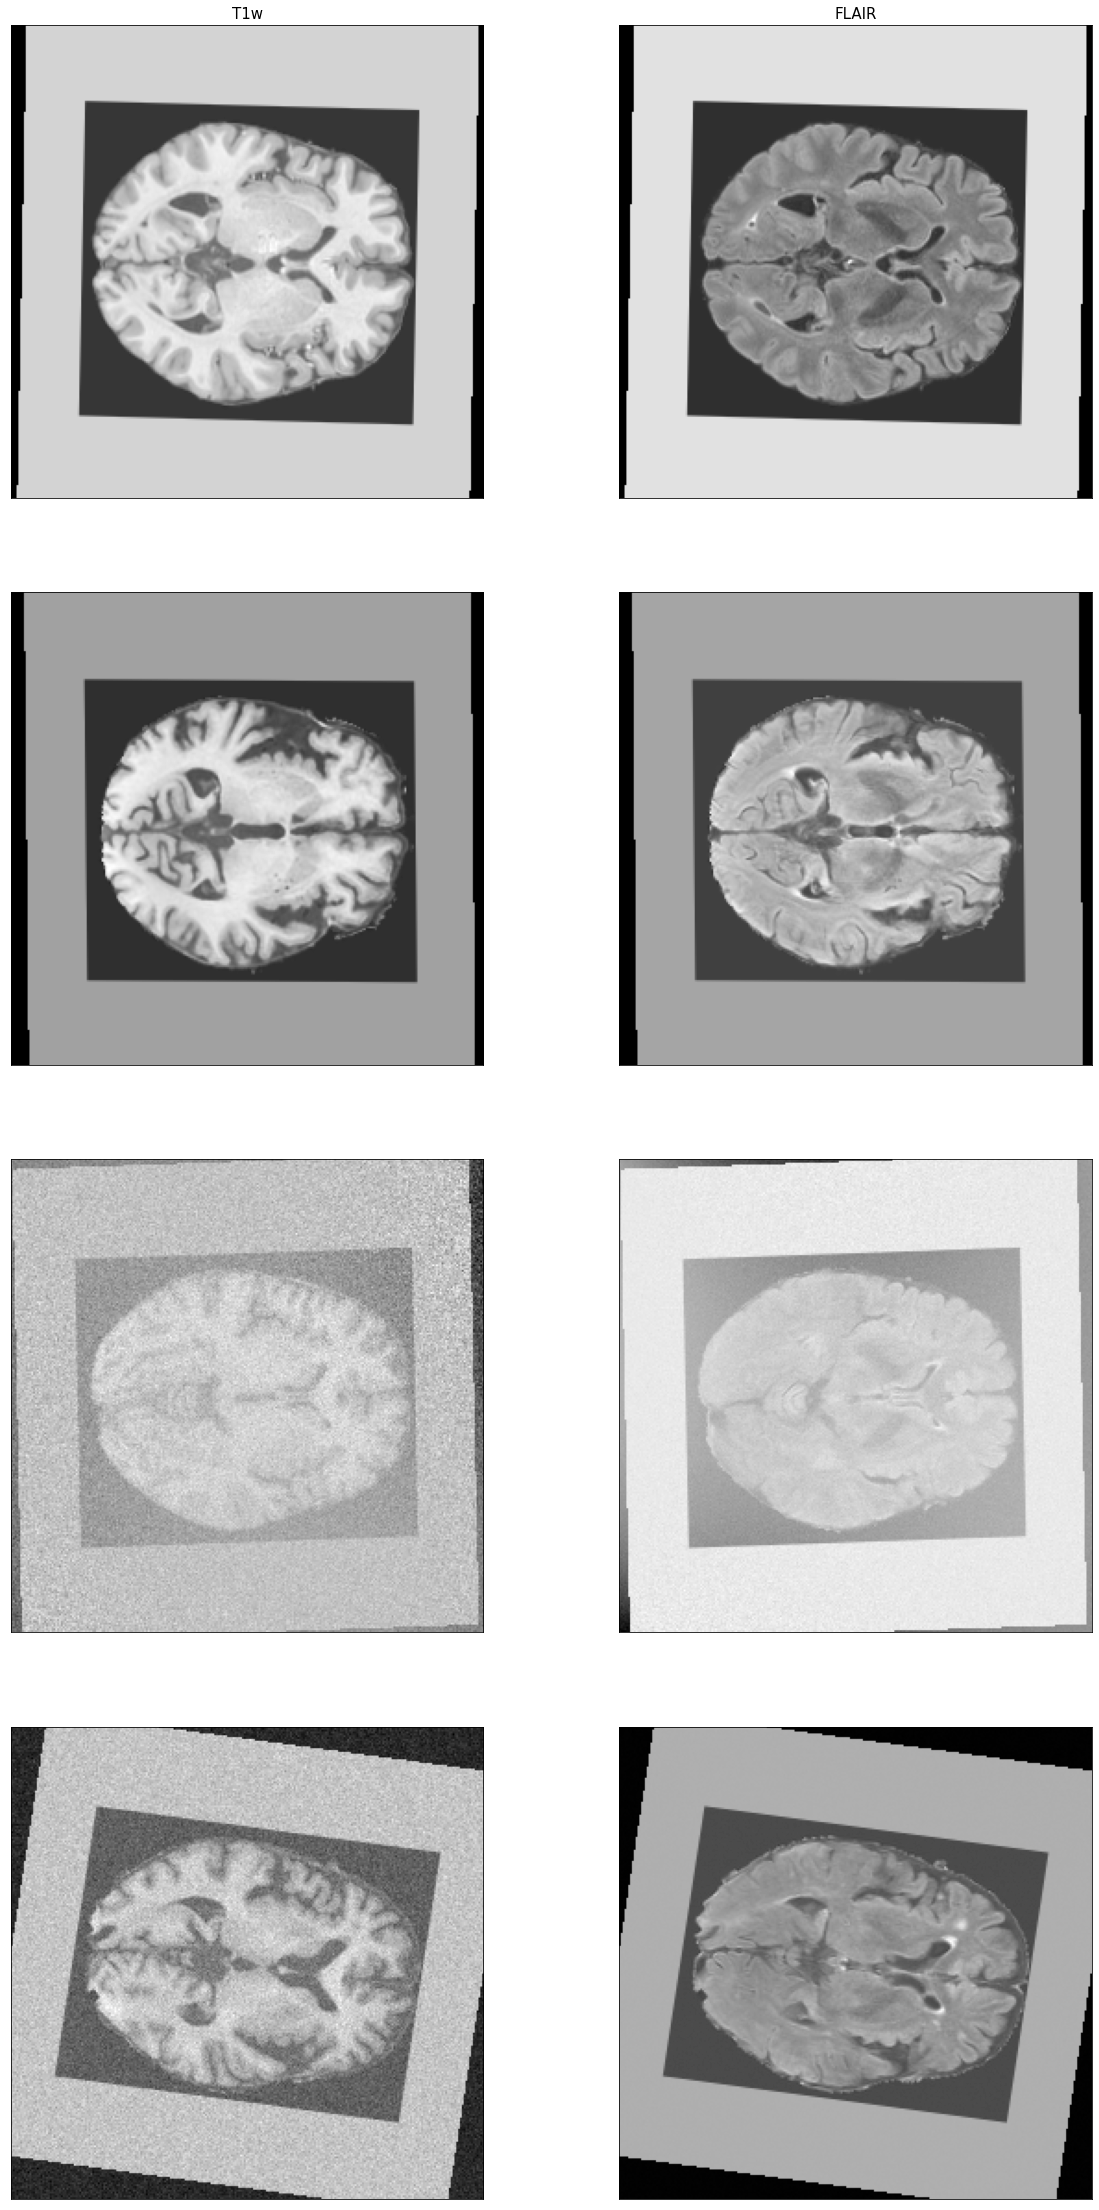

In [10]:
rio.data.plot_batch(train_batch, train=True)

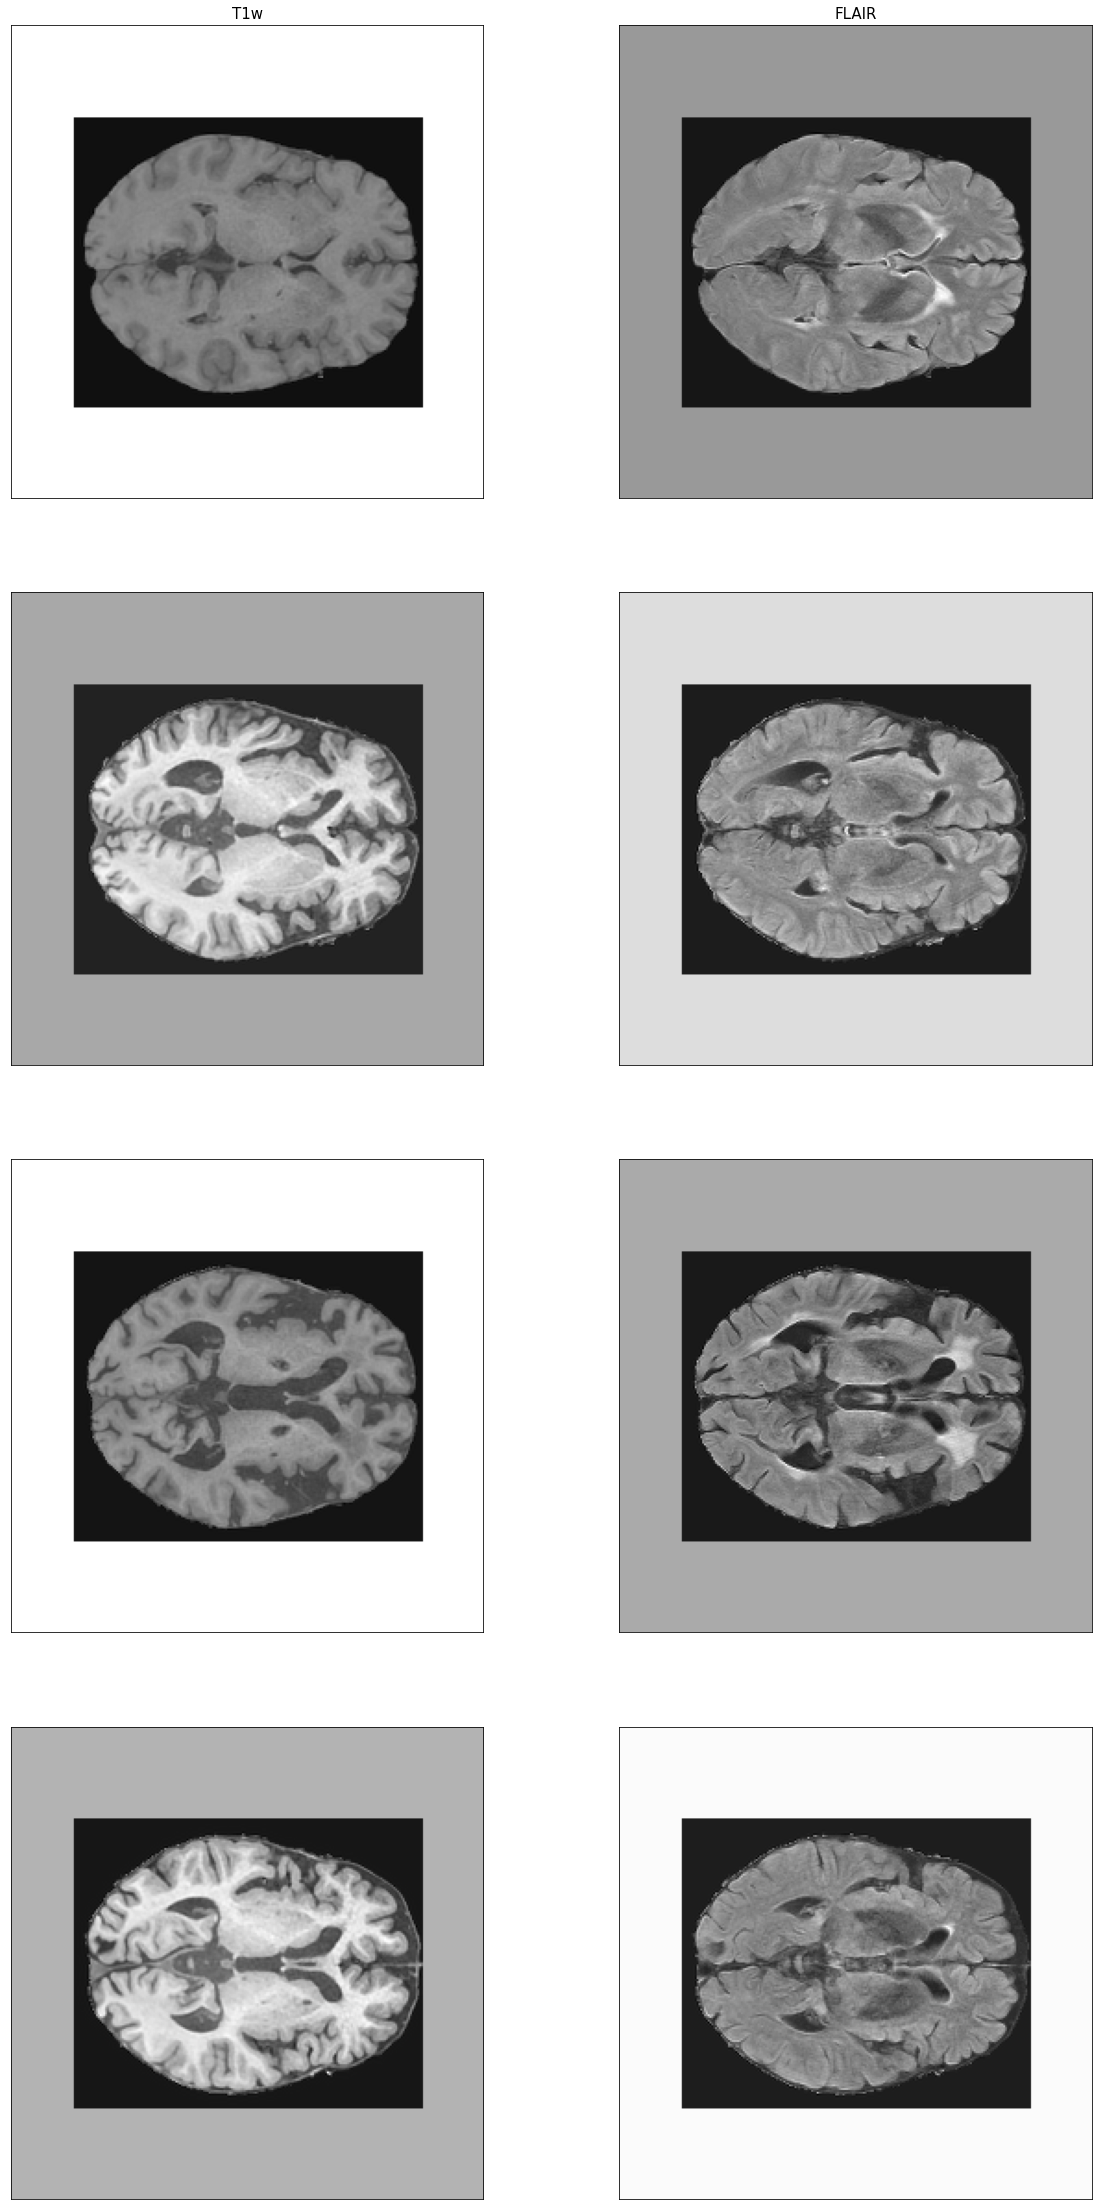

In [11]:
rio.data.plot_batch(test_batch, train=False)